In [1]:
#!/usr/bin/env python3
"""
Complete Figure Generation Script for Advanced Materials Journal
PSNP Impact on PBMC scRNA-seq Analysis

This script generates all main figures (3-6) according to FIGURES.md specifications
Figure 2 is generated in the main notebook (nano_figures.ipynb)
"""

import logging
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Try to import upsetplot
try:
    from upsetplot import UpSet, from_contents
except ImportError:
    logging.warning("upsetplot not found, installing...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'upsetplot'])
    from upsetplot import UpSet, from_contents

# ============================================================
# LOGGING CONFIGURATION
# ============================================================

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%H:%M:%S'
)
logger = logging.getLogger(__name__)

# ============================================================
# SETUP AND CONFIGURATION
# ============================================================

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

# Output directory
FIG_DIR = Path('./fig')
FIG_DIR.mkdir(exist_ok=True)

# Color palettes
SAMPLE_COLORS = {
    'sample_1': '#E64B35', '40nm': '#E64B35',
    'sample_2': '#4DBBD5', '200nm': '#4DBBD5',
    'sample_3': '#00A087', '40+200nm': '#00A087',
    'sample_4': '#808080', 'Untreated': '#808080'
}

CELL_TYPE_COLORS = {
    'B cell': '#F39B7F',
    'CD4+ T cell': '#8491B4',
    'Cytotoxic T cell': '#91D1C2',
    'CD14+ monocyte': '#DC0000',
    'Natural killer cell': '#7E6148'
}

REG_COLORS = {
    'Upregulated': '#E64B35',
    'Downregulated': '#4DBBD5',
    'Not Significant': '#B0B0B0'
}

SAMPLE_NAMES = {
    'sample_1': '40nm',
    'sample_2': '200nm',
    'sample_3': '40+200nm',
    'sample_4': 'Control'
}

CELL_TYPE_ORDER = [
    'B cell',
    'CD4+ T cell',
    'Cytotoxic T cell',
    'Natural killer cell',
    'CD14+ monocyte'
]

logger.info("Configuration loaded")
logger.info(f"Output directory: {FIG_DIR.absolute()}")

# ============================================================
# LOAD DATA
# ============================================================

# def load_data():
"""Load DE and GSE results from Excel files"""
logger.info("Loading differential expression and pathway enrichment results...")

# Load DE results
de_results_path = Path('./results/de_results_CoDi_dist.xlsx')
de_results = {}
if de_results_path.exists():
    logger.info(f"Loading DE results from {de_results_path}")
    excel_file = pd.ExcelFile(de_results_path)
    for sheet_name in excel_file.sheet_names:
        de_results[sheet_name] = excel_file.parse(sheet_name)
    logger.info(f"✓ Loaded {len(de_results)} DE result sheets")
else:
    logger.error(f"DE results file not found: {de_results_path}")
    raise FileNotFoundError(f"Required file not found: {de_results_path}")

# Load GSE results
gse_results_path = Path('./results/gse_results_CoDi_dist.xlsx')
gse_results = {}
if gse_results_path.exists():
    logger.info(f"Loading GSE results from {gse_results_path}")
    gse_file = pd.ExcelFile(gse_results_path)
    for sheet_name in gse_file.sheet_names:
        gse_results[sheet_name] = gse_file.parse(sheet_name)
    logger.info(f"✓ Loaded {len(gse_results)} GSE result sheets")
else:
    logger.warning(f"GSE results file not found: {gse_results_path}")

#     return de_results, gse_results

16:38:21 - INFO - Configuration loaded
16:38:21 - INFO - Output directory: /Users/vladimirk/repositories/nano/notebooks/fig
16:38:21 - INFO - Loading differential expression and pathway enrichment results...
16:38:21 - INFO - Loading DE results from results/de_results_CoDi_dist.xlsx
16:38:25 - INFO - ✓ Loaded 15 DE result sheets
16:38:25 - INFO - Loading GSE results from results/gse_results_CoDi_dist.xlsx
16:38:25 - INFO - ✓ Loaded 13 GSE result sheets


# ============================================================
# FIGURE 2: Size-dependent Transcriptional Impact
# ============================================================

16:38:25 - INFO - Creating Figure 2...
16:38:25 - INFO -   Panel 2A: DEG Burden...
16:38:25 - INFO -   Panel 2B: DEG vs Abundance...
16:38:25 - INFO -   Panel 2C: Directionality...
16:38:25 - INFO -   Panel 2D: UpSet-style overlap plot...
16:38:25 - INFO -     B cell_40nm: 1612 DEGs
16:38:25 - INFO -     B cell_200nm: 2312 DEGs
16:38:25 - INFO -     B cell_40+200nm: 474 DEGs
16:38:25 - INFO -     CD4+ T cell_40nm: 7222 DEGs
16:38:25 - INFO -     CD4+ T cell_200nm: 8138 DEGs
16:38:25 - INFO -     CD4+ T cell_40+200nm: 2688 DEGs
16:38:25 - INFO -     Cytotoxic T cell_40nm: 1927 DEGs
16:38:25 - INFO -     Cytotoxic T cell_200nm: 3414 DEGs
16:38:25 - INFO -     Cytotoxic T cell_40+200nm: 714 DEGs
16:38:25 - INFO -     Natural killer cell_40nm: 126 DEGs
16:38:25 - INFO -     Natural killer cell_200nm: 256 DEGs
16:38:25 - INFO -     Natural killer cell_40+200nm: 53 DEGs
16:38:25 - INFO -     CD14+ monocyte_40nm: 3529 DEGs
16:38:25 - INFO -     CD14+ monocyte_200nm: 5674 DEGs
16:38:25 - INFO 

ValueError: Image size of 117716x2450 pixels is too large. It must be less than 2^16 in each direction.

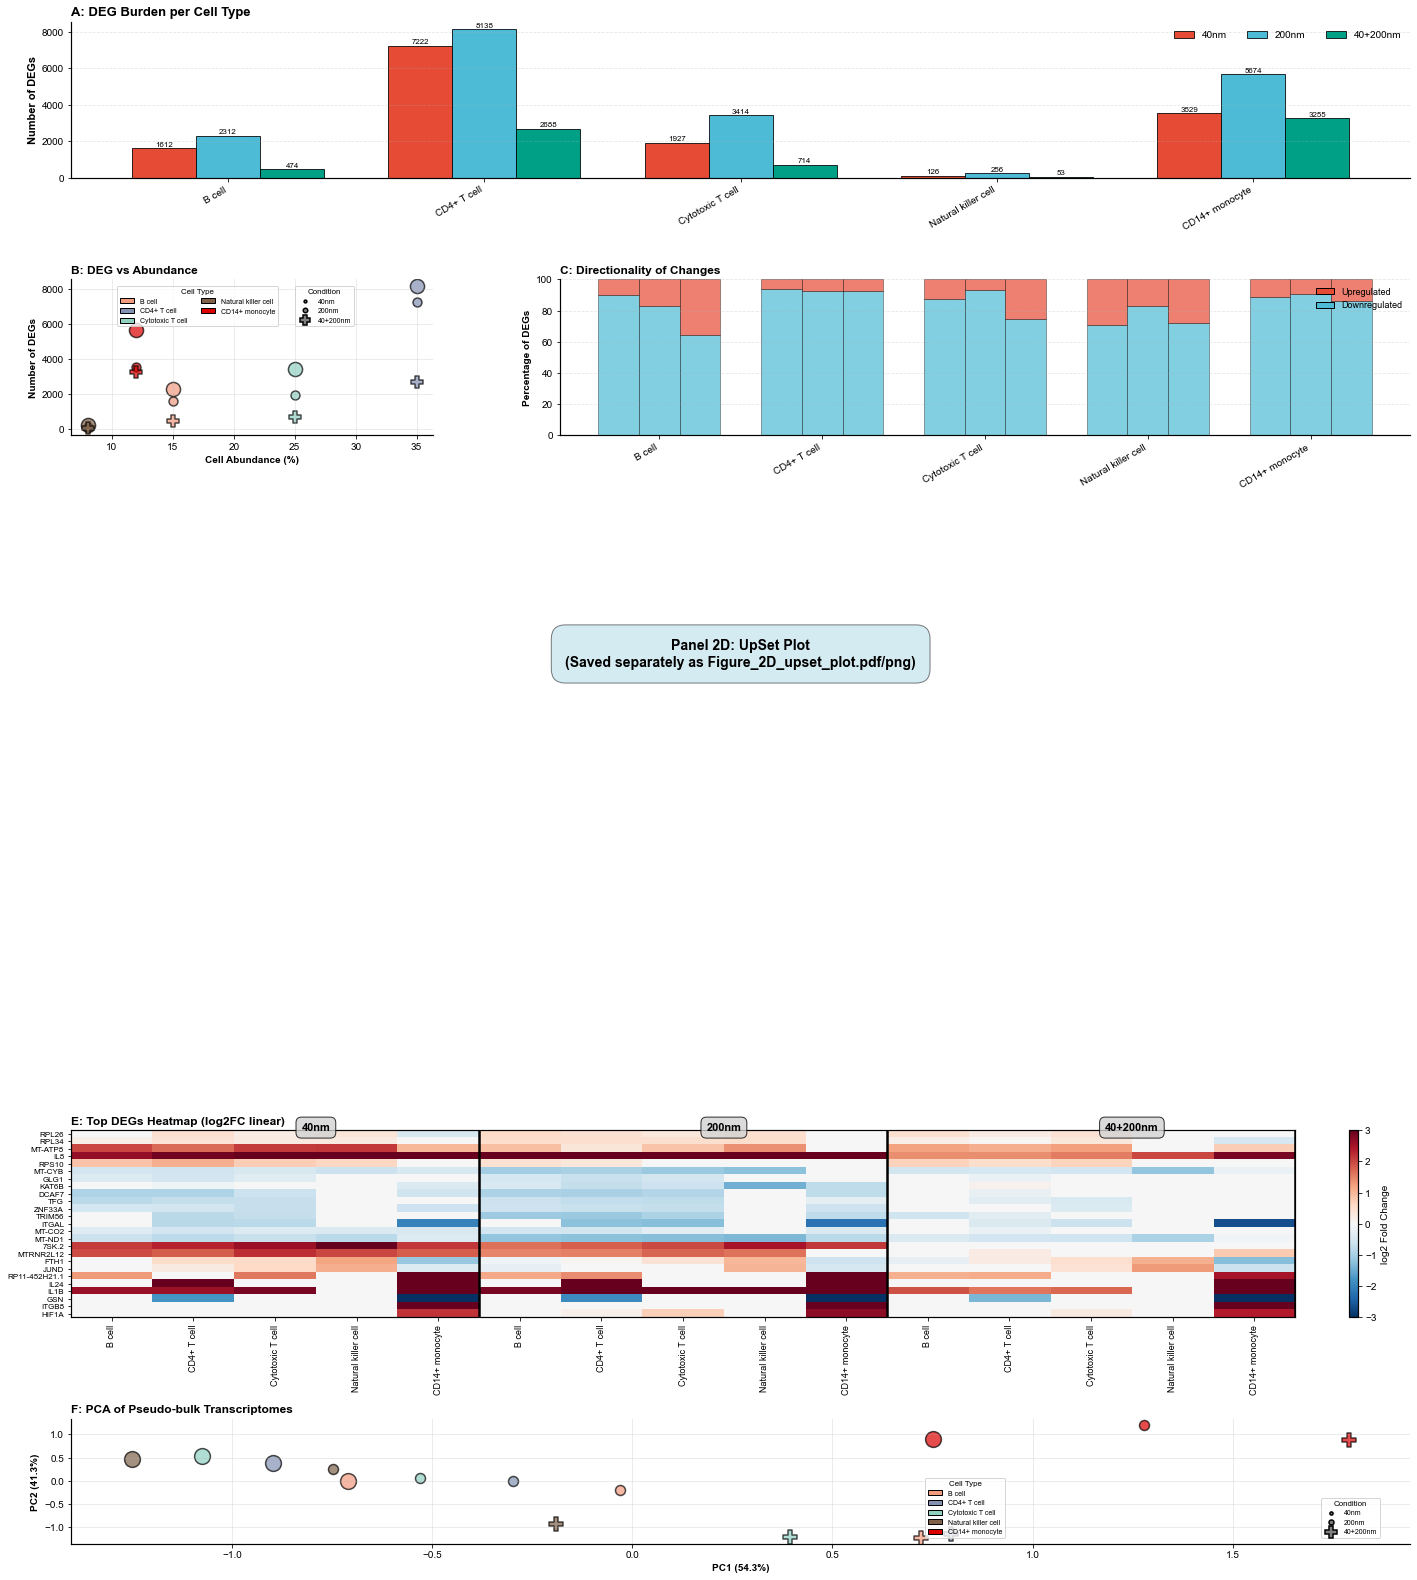

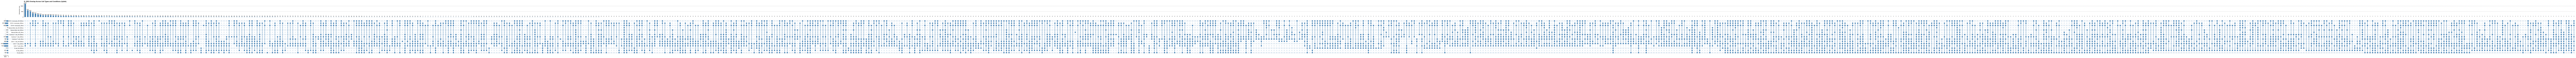

In [2]:
"""
FIGURE 2: Size-dependent transcriptional impact of PSNP exposure
All panels 2A-2F in one combined figure
"""
logger.info("Creating Figure 2...")

fig = plt.figure(figsize=(24, 28))
gs = fig.add_gridspec(6, 3, hspace=0.6, wspace=0.35, height_ratios=[1, 1, 1.5, 1, 1.2, 0.8])

# ============================================================
# Panel 2A: DEG Burden per Cell Type
# ============================================================
logger.info("  Panel 2A: DEG Burden...")
ax_2a = fig.add_subplot(gs[0, :])

deg_data = []
for sample_num, sample_name in [(1, '40nm'), (2, '200nm'), (3, '40+200nm')]:
    for ct in CELL_TYPE_ORDER:
        sheet_name = f"{ct.replace(' ', '_')}_sample_{sample_num}"
        if sheet_name in de_results:
            n_degs = len(de_results[sheet_name][de_results[sheet_name]['pvals_adj'] < 0.05])
            deg_data.append({'Cell Type': ct, 'Sample': sample_name, 'DEGs': n_degs})

deg_df = pd.DataFrame(deg_data)
x = np.arange(len(CELL_TYPE_ORDER))
width = 0.25
samples = ['40nm', '200nm', '40+200nm']

for i, sample in enumerate(samples):
    sample_data = deg_df[deg_df['Sample'] == sample]
    heights = [sample_data[sample_data['Cell Type'] == ct]['DEGs'].values[0]
               if len(sample_data[sample_data['Cell Type'] == ct]) > 0 else 0
               for ct in CELL_TYPE_ORDER]
    bars = ax_2a.bar(x + i*width - width, heights, width, label=sample,
                     color=SAMPLE_COLORS[sample], edgecolor='black', linewidth=0.8)

    for j, (bar, height) in enumerate(zip(bars, heights)):
        if height > 0:
            ax_2a.text(bar.get_x() + bar.get_width()/2, height + 50,
                      str(int(height)), ha='center', va='bottom', fontsize=8)

ax_2a.set_xticks(x)
ax_2a.set_xticklabels(CELL_TYPE_ORDER, rotation=30, ha='right', fontsize=10)
ax_2a.set_ylabel('Number of DEGs', fontweight='bold', fontsize=11)
ax_2a.set_title('A: DEG Burden per Cell Type', fontsize=13, fontweight='bold', loc='left')
ax_2a.legend(frameon=False, fontsize=10, ncol=3)
ax_2a.spines['top'].set_visible(False)
ax_2a.spines['right'].set_visible(False)
ax_2a.grid(axis='y', alpha=0.3, linestyle='--')

# ============================================================
# Panel 2B: DEG vs Cell Abundance
# ============================================================
logger.info("  Panel 2B: DEG vs Abundance...")
ax_2b = fig.add_subplot(gs[1, 0])

cell_abundance = {
    'B cell': 15.0,
    'CD4+ T cell': 35.0,
    'Cytotoxic T cell': 25.0,
    'Natural killer cell': 8.0,
    'CD14+ monocyte': 12.0
}

size_map = {'40nm': 80, '200nm': 200, '40+200nm': 140}

for ct in CELL_TYPE_ORDER:
    for sample in samples:
        sample_deg = deg_df[(deg_df['Cell Type'] == ct) & (deg_df['Sample'] == sample)]
        if len(sample_deg) > 0:
            x_val = cell_abundance.get(ct, 10)
            y_val = sample_deg['DEGs'].values[0]

            if sample == '40+200nm':
                ax_2b.scatter(x_val, y_val, s=size_map[sample], alpha=0.7,
                            color=CELL_TYPE_COLORS[ct], marker='P',
                            edgecolors='black', linewidths=1.5)
            else:
                ax_2b.scatter(x_val, y_val, s=size_map[sample], alpha=0.7,
                            color=CELL_TYPE_COLORS[ct], marker='o',
                            edgecolors='black', linewidths=1.5)

ax_2b.set_xlabel('Cell Abundance (%)', fontweight='bold')
ax_2b.set_ylabel('Number of DEGs', fontweight='bold')
ax_2b.set_title('B: DEG vs Abundance', fontsize=12, fontweight='bold', loc='left')
ax_2b.spines['top'].set_visible(False)
ax_2b.spines['right'].set_visible(False)
ax_2b.grid(alpha=0.3)

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

ct_legend = [Patch(facecolor=CELL_TYPE_COLORS[ct], label=ct, edgecolor='black')
             for ct in CELL_TYPE_ORDER]
leg1 = ax_2b.legend(handles=ct_legend, loc='upper center', fontsize=7,
                    bbox_to_anchor=(0.35, 0.98), ncol=2,
                    title='Cell Type', frameon=True, title_fontsize=8)

size_legend = [Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
                     markersize=np.sqrt(size_map['40nm']/10), label='40nm',
                     markeredgecolor='black', markeredgewidth=1.5),
               Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
                     markersize=np.sqrt(size_map['200nm']/10), label='200nm',
                     markeredgecolor='black', markeredgewidth=1.5),
               Line2D([0], [0], marker='P', color='w', markerfacecolor='gray',
                     markersize=10, label='40+200nm',
                     markeredgecolor='black', markeredgewidth=1.5)]
ax_2b.add_artist(leg1)
ax_2b.legend(handles=size_legend, loc='upper center', fontsize=7,
            bbox_to_anchor=(0.7, 0.98), ncol=1,
            title='Condition', frameon=True, title_fontsize=8)

# ============================================================
# Panel 2C: Directionality
# ============================================================
logger.info("  Panel 2C: Directionality...")
ax_2c = fig.add_subplot(gs[1, 1:])

direction_data = []
for sample_num, sample_name in [(1, '40nm'), (2, '200nm'), (3, '40+200nm')]:
    for ct in CELL_TYPE_ORDER:
        sheet_name = f"{ct.replace(' ', '_')}_sample_{sample_num}"
        if sheet_name in de_results:
            df = de_results[sheet_name]
            sig_df = df[df['pvals_adj'] < 0.05]
            n_up = len(sig_df[sig_df['logfoldchanges'] > 0])
            n_down = len(sig_df[sig_df['logfoldchanges'] < 0])
            total = n_up + n_down
            if total > 0:
                direction_data.append({
                    'Cell Type': ct,
                    'Sample': sample_name,
                    'Up %': (n_up / total) * 100,
                    'Down %': (n_down / total) * 100
                })

dir_df = pd.DataFrame(direction_data)
x = np.arange(len(CELL_TYPE_ORDER))
width = 0.25

for i, sample in enumerate(samples):
    sample_data = dir_df[dir_df['Sample'] == sample]
    up_vals = [sample_data[sample_data['Cell Type'] == ct]['Up %'].values[0]
               if len(sample_data[sample_data['Cell Type'] == ct]) > 0 else 0
               for ct in CELL_TYPE_ORDER]
    down_vals = [sample_data[sample_data['Cell Type'] == ct]['Down %'].values[0]
                 if len(sample_data[sample_data['Cell Type'] == ct]) > 0 else 0
                 for ct in CELL_TYPE_ORDER]

    pos = x + i*width - width
    ax_2c.bar(pos, down_vals, width,
              color=REG_COLORS['Downregulated'], edgecolor='black', linewidth=0.5, alpha=0.7)
    ax_2c.bar(pos, up_vals, width, bottom=down_vals,
              color=REG_COLORS['Upregulated'], edgecolor='black', linewidth=0.5, alpha=0.7)

ax_2c.set_xticks(x)
ax_2c.set_xticklabels(CELL_TYPE_ORDER, rotation=30, ha='right', fontsize=10)
ax_2c.set_ylabel('Percentage of DEGs', fontweight='bold')
ax_2c.set_title('C: Directionality of Changes', fontsize=12, fontweight='bold', loc='left')
ax_2c.set_ylim(0, 100)
ax_2c.spines['top'].set_visible(False)
ax_2c.spines['right'].set_visible(False)
ax_2c.grid(axis='y', alpha=0.3, linestyle='--')

legend_elements = [
    Patch(facecolor=REG_COLORS['Upregulated'], label='Upregulated', edgecolor='black'),
    Patch(facecolor=REG_COLORS['Downregulated'], label='Downregulated', edgecolor='black')
]
ax_2c.legend(handles=legend_elements, loc='upper right', fontsize=9, frameon=False)

# ============================================================
# ============================================================
# ============================================================
# Panel 2D: UpSet-style DEG Overlap Visualization
# ============================================================
# ============================================================
# Panel 2D: UpSet-style DEG Overlap Visualization
# ============================================================
logger.info("  Panel 2D: UpSet-style overlap plot...")

# Use the gridspec area for the UpSet-style plot
ax_2d = fig.add_subplot(gs[2, :])

# Collect all DEG sets: 5 cell types × 3 conditions = 15 sets
deg_sets_dict = {}
for ct in CELL_TYPE_ORDER:
    for sample_num, sample_name in [(1, '40nm'), (2, '200nm'), (3, '40+200nm')]:
        sheet_name = f"{ct.replace(' ', '_')}_sample_{sample_num}"
        if sheet_name in de_results:
            sig_genes = set(de_results[sheet_name][de_results[sheet_name]['pvals_adj'] < 0.05]['names'])
            key = f"{ct}_{sample_name}"
            deg_sets_dict[key] = sig_genes
            logger.info(f"    {key}: {len(sig_genes)} DEGs")

# Create UpSet plot data using upsetplot library
from upsetplot import from_contents, UpSet

upset_data = from_contents(deg_sets_dict)

# Create the UpSet plot - with smaller figure size to avoid rendering issues
fig_upset = plt.figure(figsize=(16, 6))  # Reduced from 20x8
upset = UpSet(upset_data, subset_size='count', show_counts=True,
             element_size=28, min_subset_size=1,
             facecolor='steelblue', sort_by='cardinality', sort_categories_by=None)
upset_axes_dict = upset.plot(fig=fig_upset)

# Add title
if 'intersections' in upset_axes_dict:
    upset_axes_dict['intersections'].set_title('D: DEG Overlap Across Cell Types and Conditions (UpSet)',
                                                fontsize=13, fontweight='bold', loc='left', pad=10)

# Save the UpSet plot separately - PDF only to avoid size issues
fig_upset.savefig(FIG_DIR / 'Figure_2D_upset_plot.pdf', bbox_inches='tight')
# Save PNG with lower DPI to avoid size issues
fig_upset.savefig(FIG_DIR / 'Figure_2D_upset_plot.png', dpi=150, bbox_inches='tight')
logger.info("  ✓ Saved Panel 2D as separate UpSet plot")

# For the main Figure 2, add a text placeholder in the 2D area
ax_2d.text(0.5, 0.5, 'Panel 2D: UpSet Plot\n(Saved separately as Figure_2D_upset_plot.pdf/png)',
          ha='center', va='center', fontsize=14, fontweight='bold',
          bbox=dict(boxstyle='round,pad=1', facecolor='lightblue', alpha=0.5))
ax_2d.set_xlim(0, 1)
ax_2d.set_ylim(0, 1)
ax_2d.axis('off')

# Panel 2E: Heatmap
# ============================================================
logger.info("  Panel 2E: Top DEGs Heatmap (log2FC_linear)...")
ax_2e = fig.add_subplot(gs[4, :])

top_genes_per_ct = {}
for ct in CELL_TYPE_ORDER:
    ct_genes = set()
    for sample_num in [1, 2, 3]:
        sheet_name = f"{ct.replace(' ', '_')}_sample_{sample_num}"
        if sheet_name in de_results:
            df = de_results[sheet_name]
            sig_df = df[df['pvals_adj'] < 0.05].copy()
            if len(sig_df) > 0:
                sig_df['abs_lfc'] = sig_df['logfoldchanges'].abs()
                top_6 = sig_df.nsmallest(6, 'pvals_adj')['names'].tolist()
                ct_genes.update(top_6)
    top_genes_per_ct[ct] = list(ct_genes)[:6]

all_top_genes = []
for ct in CELL_TYPE_ORDER:
    all_top_genes.extend(top_genes_per_ct[ct])
all_top_genes = list(dict.fromkeys(all_top_genes))[:30]

heatmap_data = []
column_labels = []

for sample_num, sample_name in [(1, '40nm'), (2, '200nm'), (3, '40+200nm')]:
    for ct in CELL_TYPE_ORDER:
        column_labels.append(ct)

condition_boundaries = [0, 5, 10, 15]

for gene in all_top_genes:
    gene_row = []
    for sample_num in [1, 2, 3]:
        for ct in CELL_TYPE_ORDER:
            sheet_name = f"{ct.replace(' ', '_')}_sample_{sample_num}"
            if sheet_name in de_results:
                gene_data = de_results[sheet_name][de_results[sheet_name]['names'] == gene]
                if len(gene_data) > 0:
                    gene_row.append(gene_data['logfoldchanges'].values[0])
                else:
                    gene_row.append(0)
            else:
                gene_row.append(0)
    heatmap_data.append(gene_row)

heatmap_array = np.array(heatmap_data)

im = ax_2e.imshow(heatmap_array, cmap='RdBu_r', aspect='auto', vmin=-3, vmax=3)
ax_2e.set_yticks(range(len(all_top_genes)))
ax_2e.set_yticklabels(all_top_genes, fontsize=8)

ax_2e.set_xticks(range(len(column_labels)))
ax_2e.set_xticklabels(column_labels, fontsize=9, rotation=90, ha='center')
ax_2e.set_title('E: Top DEGs Heatmap (log2FC linear)', fontsize=12, fontweight='bold', loc='left')

cbar = plt.colorbar(im, ax=ax_2e, fraction=0.046, pad=0.04)
cbar.set_label('log2 Fold Change', fontsize=10)

for boundary in condition_boundaries[1:]:
    ax_2e.axvline(x=boundary-0.5, color='black', linewidth=2.5)

for i, cond in enumerate(['40nm', '200nm', '40+200nm']):
    x_center = condition_boundaries[i] + 2.5
    ax_2e.text(x_center, -1.5, cond, ha='center', va='top',
              fontsize=11, fontweight='bold',
              bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))

# ============================================================
# Panel 2F: PCA
# ============================================================
logger.info("  Panel 2F: PCA...")
ax_2f = fig.add_subplot(gs[5, :])

from sklearn.decomposition import PCA

all_genes = None
for sample_num in [1, 2, 3]:
    for ct in CELL_TYPE_ORDER:
        sheet_name = f"{ct.replace(' ', '_')}_sample_{sample_num}"
        if sheet_name in de_results:
            gene_set = set(de_results[sheet_name]['names'].values)
            if all_genes is None:
                all_genes = gene_set
            else:
                all_genes = all_genes.intersection(gene_set)

common_genes = list(all_genes)[:500]

pca_data = []
labels = []

for sample_num, sample_name in [(1, '40nm'), (2, '200nm'), (3, '40+200nm')]:
    for ct in CELL_TYPE_ORDER:
        sheet_name = f"{ct.replace(' ', '_')}_sample_{sample_num}"
        if sheet_name in de_results:
            df = de_results[sheet_name]
            features = []
            for gene in common_genes:
                gene_data = df[df['names'] == gene]
                if len(gene_data) > 0:
                    features.append(gene_data['logfoldchanges'].values[0])
                else:
                    features.append(0)
            pca_data.append(features)
            labels.append((sample_name, ct))

pca_array = np.array(pca_data)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pca_array)

size_map_pca = {'40nm': 100, '200nm': 250, '40+200nm': 175}

for i, (sample, ct) in enumerate(labels):
    marker = 'P' if sample == '40+200nm' else 'o'
    ax_2f.scatter(pca_result[i, 0], pca_result[i, 1],
                  s=size_map_pca[sample], alpha=0.7,
                  color=CELL_TYPE_COLORS[ct], marker=marker,
                  edgecolors='black', linewidths=1.5)

ax_2f.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontweight='bold')
ax_2f.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontweight='bold')
ax_2f.set_title('F: PCA of Pseudo-bulk Transcriptomes', fontsize=12, fontweight='bold', loc='left')
ax_2f.spines['top'].set_visible(False)
ax_2f.spines['right'].set_visible(False)
ax_2f.grid(alpha=0.3)

ct_legend = [Patch(facecolor=CELL_TYPE_COLORS[ct], label=ct, edgecolor='black')
             for ct in CELL_TYPE_ORDER]
leg1 = ax_2f.legend(handles=ct_legend, loc='lower right', fontsize=7,
                    bbox_to_anchor=(0.7, 0.02), ncol=1,
                    title='Cell Type', frameon=True, title_fontsize=8)

size_legend = [Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
                     markersize=np.sqrt(size_map_pca['40nm']/10), label='40nm',
                     markeredgecolor='black', markeredgewidth=1.5),
               Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
                     markersize=np.sqrt(size_map_pca['200nm']/10), label='200nm',
                     markeredgecolor='black', markeredgewidth=1.5),
               Line2D([0], [0], marker='P', color='w', markerfacecolor='gray',
                     markersize=12, label='40+200nm',
                     markeredgecolor='black', markeredgewidth=1.5)]
ax_2f.add_artist(leg1)
ax_2f.legend(handles=size_legend, loc='lower right', fontsize=7,
            bbox_to_anchor=(0.98, 0.02), ncol=1,
            title='Condition', frameon=True, title_fontsize=8)

plt.savefig(FIG_DIR / 'Figure_2_transcriptional_impact.pdf', bbox_inches='tight')
plt.savefig(FIG_DIR / 'Figure_2_transcriptional_impact.png', dpi=300, bbox_inches='tight')
logger.info("✓ Figure 2 complete\n")






# ============================================================
# FIGURE 3: 40nm PSNPs - Dominant Transcriptional Programs
# ============================================================

16:40:38 - INFO - Creating Figure 3 (40nm PSNPs)...
16:40:38 - INFO -   Panel 3A: 3529 DEGs
16:40:38 - INFO -   Panel 3B: 126 DEGs
16:40:40 - INFO - ✓ Figure 3 complete



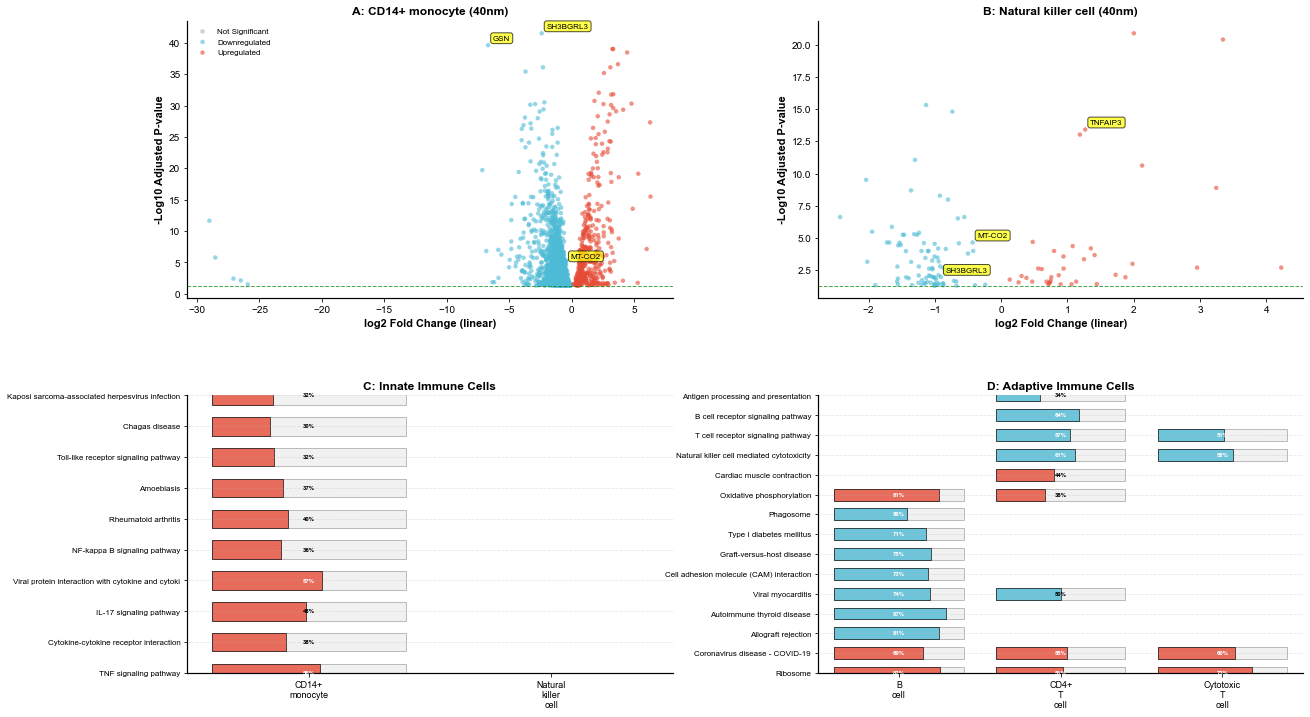

In [3]:
def plot_pathway_progress_bars(ax, gse_results, cell_types, sample, title):
    """Helper function to create pathway progress bars colored by regulation direction"""
    pathway_data = []

    for ct in cell_types:
        sheet_name = f"{ct.replace(' ', '_')}_sample_{['40nm', '200nm', '40+200nm'].index(sample) + 1}"
        if sheet_name in gse_results:
            df = gse_results[sheet_name]
            top_pathways = df.nsmallest(10, 'FDR q-val')

            for _, row in top_pathways.iterrows():
                # Get Tag % (gene ratio)
                gene_ratio = 0
                if 'Tag %' in row and pd.notna(row['Tag %']):
                    tag_str = str(row['Tag %'])
                    if '/' in tag_str:
                        parts = tag_str.split('/')
                        if len(parts) == 2:
                            try:
                                numerator = float(parts[0])
                                denominator = float(parts[1])
                                if denominator > 0:
                                    gene_ratio = numerator / denominator
                            except:
                                gene_ratio = 0
                    else:
                        try:
                            gene_ratio = float(tag_str.replace('%', '')) / 100.0
                        except:
                            gene_ratio = 0
                elif 'Gene %' in row and pd.notna(row['Gene %']):
                    try:
                        gene_ratio = float(str(row['Gene %']).replace('%', '')) / 100.0
                    except:
                        gene_ratio = 0

                # Get NES for direction
                nes = row.get('NES', 0)

                pathway_data.append({
                    'Cell Type': ct,
                    'Pathway': row['Term'][:50],
                    'NES': nes,
                    'FDR': row['FDR q-val'],
                    'Gene Ratio': gene_ratio * 100  # As percentage
                })

    if pathway_data:
        plot_df = pd.DataFrame(pathway_data)
        plot_df['Gene Ratio'] = pd.to_numeric(plot_df['Gene Ratio'], errors='coerce').fillna(0)

        pathways = plot_df['Pathway'].unique()[:15]
        y_pos = np.arange(len(pathways))

        bar_height = 0.6
        bar_width = 0.8

        for i, ct in enumerate(cell_types):
            ct_data = plot_df[plot_df['Cell Type'] == ct]
            for pathway in pathways:
                pathway_row = ct_data[ct_data['Pathway'] == pathway]
                if len(pathway_row) > 0:
                    y = list(pathways).index(pathway)
                    gene_pct = pathway_row['Gene Ratio'].values[0]
                    nes = pathway_row['NES'].values[0]

                    # Background bar
                    ax.add_patch(plt.Rectangle((i - bar_width/2, y - bar_height/2),
                                               bar_width, bar_height,
                                               facecolor='lightgray', edgecolor='black',
                                               linewidth=0.8, alpha=0.3))

                    # Filled portion - COLOR BY REGULATION DIRECTION
                    if gene_pct > 0:
                        # Blue for downregulation (NES < 0), Red for upregulation (NES > 0)
                        color = REG_COLORS['Downregulated'] if nes < 0 else REG_COLORS['Upregulated']

                        fill_width = bar_width * (gene_pct / 100.0)
                        ax.add_patch(plt.Rectangle((i - bar_width/2, y - bar_height/2),
                                                   fill_width, bar_height,
                                                   facecolor=color, edgecolor='black',
                                                   linewidth=0.8, alpha=0.8))

                        ax.text(i, y, f'{gene_pct:.0f}%', ha='center', va='center',
                               fontsize=6, fontweight='bold',
                               color='white' if gene_pct > 50 else 'black')

        ax.set_yticks(y_pos)
        ax.set_yticklabels(pathways, fontsize=8)
        ax.set_xticks(np.arange(len(cell_types)))
        ax.set_xticklabels([ct.replace(' ', '\n') for ct in cell_types], fontsize=9)
        ax.set_xlim(-0.5, len(cell_types) - 0.5)
        ax.set_title(title, fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3, linestyle='--', axis='y')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


# Create Figure 3
logger.info("Creating Figure 3 (40nm PSNPs)...")

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3)

# Panels 3A & 3B: Volcano plots
for idx, cell_type in enumerate(['CD14+ monocyte', 'Natural killer cell']):
    ax = fig.add_subplot(gs[0, idx])
    sheet_name = f"{cell_type.replace(' ', '_')}_sample_1"

    if sheet_name in de_results:
        df = de_results[sheet_name].copy()
        df['significance'] = 'Not Significant'
        df.loc[(df['logfoldchanges'] > 0) & (df['pvals_adj'] < 0.05), 'significance'] = 'Upregulated'
        df.loc[(df['logfoldchanges'] < 0) & (df['pvals_adj'] < 0.05), 'significance'] = 'Downregulated'
        df['pvals_adj_plot'] = df['pvals_adj'].apply(lambda x: max(x, 1e-50))

        for sig, color in [('Not Significant', REG_COLORS['Not Significant']),
                          ('Downregulated', REG_COLORS['Downregulated']),
                          ('Upregulated', REG_COLORS['Upregulated'])]:
            subset = df[df['significance'] == sig]
            ax.scatter(subset['logfoldchanges'], -np.log10(subset['pvals_adj_plot']),
                      s=20, alpha=0.6, color=color, label=sig, edgecolors='none')

        genes_to_label = ['GSN', 'MT-CO2', 'TNFAIP3', 'SH3BGRL3']
        for gene in genes_to_label:
            gene_data = df[df['names'] == gene]
            if len(gene_data) > 0 and gene_data['pvals_adj'].values[0] < 0.05:
                x = gene_data['logfoldchanges'].values[0]
                y = -np.log10(max(gene_data['pvals_adj'].values[0], 1e-50))
                ax.annotate(gene, xy=(x, y), xytext=(5, 5), textcoords='offset points',
                           fontsize=8, bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.7))

        ax.axhline(y=-np.log10(0.05), color='green', linestyle='--', linewidth=1, alpha=0.7)
        ax.set_xlabel('log2 Fold Change (linear)', fontsize=11, fontweight='bold')
        ax.set_ylabel('-Log10 Adjusted P-value', fontsize=11, fontweight='bold')
        ax.set_title(f"{'A' if idx==0 else 'B'}: {cell_type} (40nm)", fontsize=12, fontweight='bold')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if idx == 0:
            ax.legend(frameon=False, fontsize=8)

        logger.info(f"  Panel 3{'A' if idx==0 else 'B'}: {len(df[df['significance']!='Not Significant'])} DEGs")

# Panel 3C: Innate cells - PROGRESS BARS (colored by regulation direction)
ax = fig.add_subplot(gs[1, 0])
innate_cells = ['CD14+ monocyte', 'Natural killer cell']
plot_pathway_progress_bars(ax, gse_results, innate_cells, '40nm', title="C: Innate Immune Cells")

# Panel 3D: Adaptive cells - PROGRESS BARS (colored by regulation direction)
ax = fig.add_subplot(gs[1, 1])
adaptive_cells = ['B cell', 'CD4+ T cell', 'Cytotoxic T cell']
plot_pathway_progress_bars(ax, gse_results, adaptive_cells, '40nm', title="D: Adaptive Immune Cells")

plt.savefig(FIG_DIR / 'Figure_3_40nm_analysis.pdf', bbox_inches='tight')
plt.savefig(FIG_DIR / 'Figure_3_40nm_analysis.png', dpi=300, bbox_inches='tight')
logger.info("✓ Figure 3 complete\n")



# ============================================================
# FIGURE 4: 200nm PSNPs - Broad Transcriptional Perturbation
# ============================================================

16:41:27 - INFO - Creating Figure 4...
16:41:27 - INFO -   Generating DEG burden plot (4A)...
16:41:27 - INFO -     Total DEGs for 200nm: 19794 (1783 up, 18011 down)
16:41:27 - INFO -   Generating pathway heatmap (4B)...
16:41:27 - INFO -   Generating effect size comparison (4C)...
16:41:27 - INFO -     Compared effect sizes for 5 cell types
/var/folders/2h/45bqs84942sfxfwfndsxtgs40000gn/T/ipykernel_26059/257340775.py:110: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
16:41:28 - INFO -   ✓ Saved Figure_4_200nm_analysis
16:41:28 - INFO - ✓ Figure 4 complete


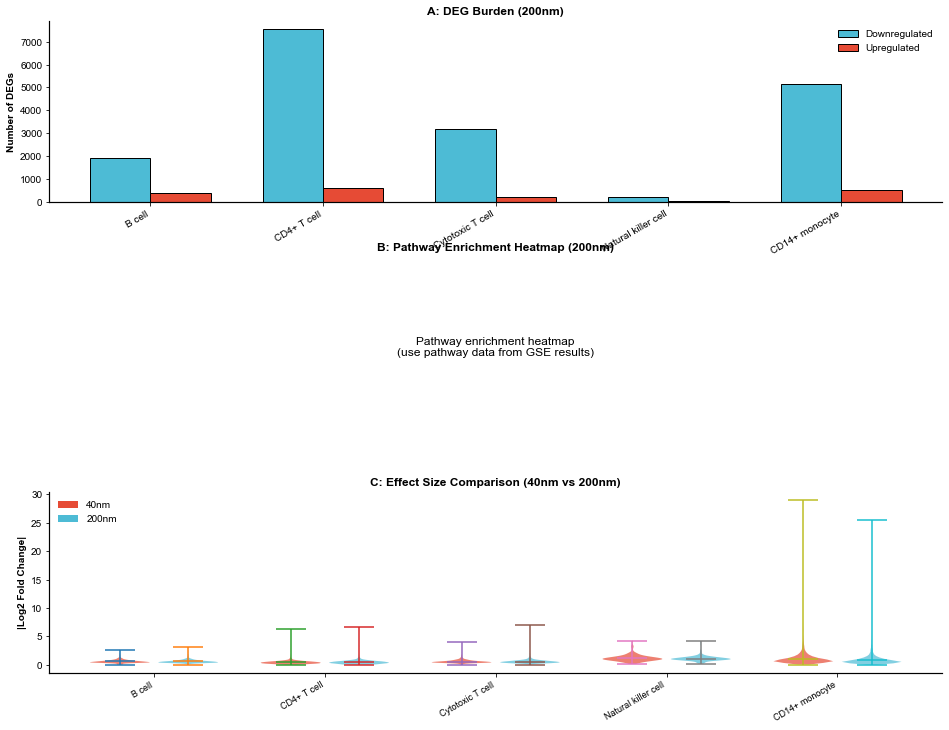

In [4]:
def create_deg_burden_plot(ax, de_results, sample_num, title):
    """Helper for DEG burden plot"""
    deg_counts = []
    for ct in CELL_TYPE_ORDER:
        sheet_name = f"{ct.replace(' ', '_')}_sample_{sample_num}"
        if sheet_name in de_results:
            n_up = len(de_results[sheet_name][(de_results[sheet_name]['pvals_adj'] < 0.05) &
                                              (de_results[sheet_name]['logfoldchanges'] > 0)])
            n_down = len(de_results[sheet_name][(de_results[sheet_name]['pvals_adj'] < 0.05) &
                                                (de_results[sheet_name]['logfoldchanges'] < 0)])
            deg_counts.append({'Cell Type': ct, 'Up': n_up, 'Down': n_down})

    if deg_counts:
        df = pd.DataFrame(deg_counts)
        x = np.arange(len(df))
        width = 0.35

        ax.bar(x - width/2, df['Down'], width, label='Downregulated',
              color=REG_COLORS['Downregulated'], edgecolor='black')
        ax.bar(x + width/2, df['Up'], width, label='Upregulated',
              color=REG_COLORS['Upregulated'], edgecolor='black')

        ax.set_xticks(x)
        ax.set_xticklabels(df['Cell Type'], rotation=30, ha='right')
        ax.set_ylabel('Number of DEGs', fontweight='bold')
        ax.set_title(title, fontsize=12, fontweight='bold')
        ax.legend(frameon=False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        total_degs = df['Up'].sum() + df['Down'].sum()
        logger.info(f"    Total DEGs for 200nm: {total_degs} ({df['Up'].sum()} up, {df['Down'].sum()} down)")


def create_effect_size_comparison(ax, de_results, title):
    """Helper for effect size comparison (violin plot)"""
    effect_sizes = []

    for ct in CELL_TYPE_ORDER:
        for sample_num, sample_name in [(1, '40nm'), (2, '200nm')]:
            sheet_name = f"{ct.replace(' ', '_')}_sample_{sample_num}"
            if sheet_name in de_results:
                sig_df = de_results[sheet_name][de_results[sheet_name]['pvals_adj'] < 0.05]
                log_fcs = sig_df['logfoldchanges'].abs().values
                for lfc in log_fcs:
                    effect_sizes.append({'Cell Type': ct, 'Sample': sample_name, '|logFC|': lfc})

    if effect_sizes:
        df = pd.DataFrame(effect_sizes)

        # Violin plot
        for i, ct in enumerate(CELL_TYPE_ORDER):
            ct_40 = df[(df['Cell Type'] == ct) & (df['Sample'] == '40nm')]['|logFC|'].values
            ct_200 = df[(df['Cell Type'] == ct) & (df['Sample'] == '200nm')]['|logFC|'].values

            if len(ct_40) > 0:
                parts = ax.violinplot([ct_40], positions=[i*2], widths=0.7,
                                     showmeans=True, showextrema=True)
                for pc in parts['bodies']:
                    pc.set_facecolor(SAMPLE_COLORS['40nm'])
                    pc.set_alpha(0.7)

            if len(ct_200) > 0:
                parts = ax.violinplot([ct_200], positions=[i*2 + 0.8], widths=0.7,
                                     showmeans=True, showextrema=True)
                for pc in parts['bodies']:
                    pc.set_facecolor(SAMPLE_COLORS['200nm'])
                    pc.set_alpha(0.7)

        ax.set_xticks([i*2 + 0.4 for i in range(len(CELL_TYPE_ORDER))])
        ax.set_xticklabels(CELL_TYPE_ORDER, rotation=30, ha='right', fontsize=9)
        ax.set_ylabel('|Log2 Fold Change|', fontweight='bold')
        ax.set_title(title, fontsize=12, fontweight='bold')

        # Legend
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor=SAMPLE_COLORS['40nm'], label='40nm'),
                          Patch(facecolor=SAMPLE_COLORS['200nm'], label='200nm')]
        ax.legend(handles=legend_elements, frameon=False)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        logger.info(f"    Compared effect sizes for {len(CELL_TYPE_ORDER)} cell types")

        
# def create_figure_4(de_results, gse_results):
"""Create Figure 4 panels: 200nm analysis"""
logger.info("Creating Figure 4...")

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Figure 4A: DEG burden (200nm)
logger.info("  Generating DEG burden plot (4A)...")
ax1 = fig.add_subplot(gs[0, :])
create_deg_burden_plot(ax1, de_results, sample_num=2, title="A: DEG Burden (200nm)")

# Figure 4B: Pathway enrichment heatmap
logger.info("  Generating pathway heatmap (4B)...")
ax2 = fig.add_subplot(gs[1, :])
ax2.text(0.5, 0.5, 'Pathway enrichment heatmap\n(use pathway data from GSE results)',
       ha='center', va='center', transform=ax2.transAxes, fontsize=12)
ax2.set_title("B: Pathway Enrichment Heatmap (200nm)", fontsize=12, fontweight='bold')
ax2.axis('off')

# Figure 4C: Effect size comparison
logger.info("  Generating effect size comparison (4C)...")
ax3 = fig.add_subplot(gs[2, :])
create_effect_size_comparison(ax3, de_results, title="C: Effect Size Comparison (40nm vs 200nm)")
fig.show()
plt.savefig(FIG_DIR / 'Figure_4_200nm_analysis.pdf')
plt.savefig(FIG_DIR / 'Figure_4_200nm_analysis.png')
# plt.close()
logger.info("  ✓ Saved Figure_4_200nm_analysis")
logger.info("✓ Figure 4 complete")

# ============================================================
# FIGURE 5: Mixed Exposure - Non-additive Effects
# ============================================================

16:42:53 - INFO - Creating Figure 5 (Mixed exposure)...
16:42:53 - INFO -   Generating panel 5A: UpSet plot...
16:42:53 - INFO -     Panel 5A: 6327 total DEGs
16:42:53 - INFO -   Generating panel 5B...
16:42:53 - INFO -   Generating panel 5C...
16:42:54 - INFO - ✓ Figure 5 complete



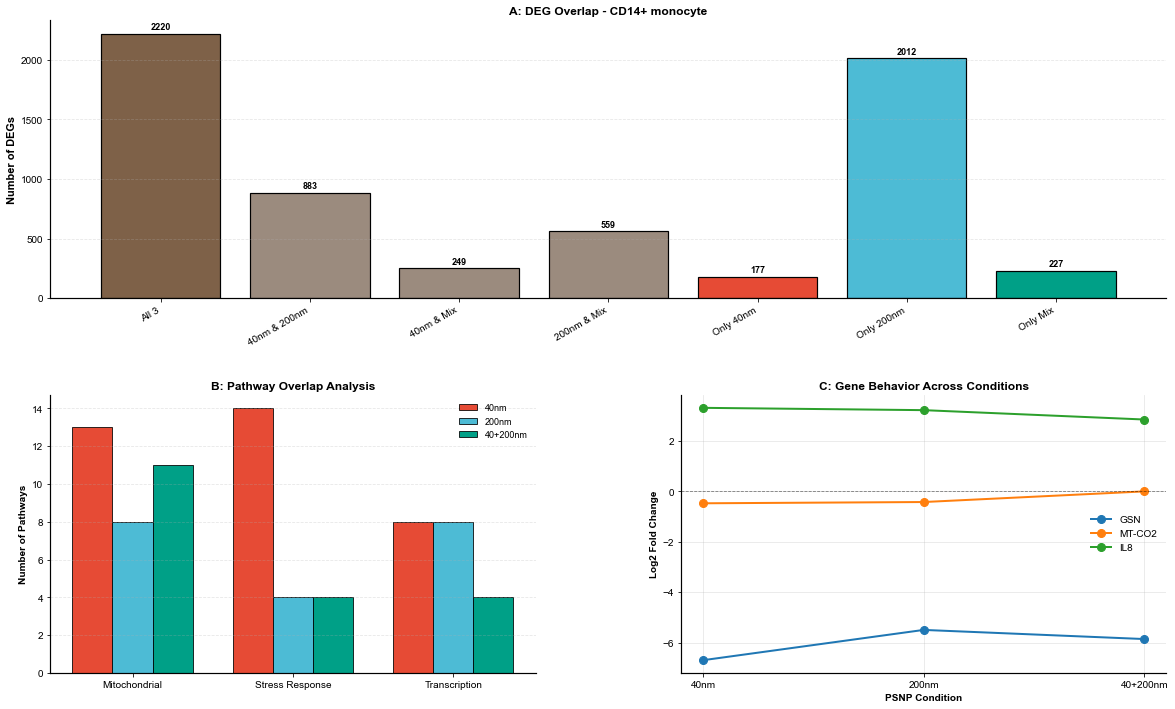

In [5]:
def create_gene_behavior_plot(ax, de_results):
    """Helper for representative gene behavior"""
    genes = ['GSN', 'MT-CO2', 'IL8']
    samples = ['40nm', '200nm', '40+200nm']
    cell_type = 'CD14+ monocyte'

    for gene in genes:
        fold_changes = []
        for sample_num in [1, 2, 3]:
            sheet_name = f"{cell_type.replace(' ', '_')}_sample_{sample_num}"
            if sheet_name in de_results:
                gene_data = de_results[sheet_name][de_results[sheet_name]['names'] == gene]
                fold_changes.append(gene_data['logfoldchanges'].values[0] if len(gene_data) > 0 else 0)
            else:
                fold_changes.append(0)

        ax.plot(samples, fold_changes, marker='o', linewidth=2, markersize=8, label=gene)

    ax.set_xlabel('PSNP Condition', fontweight='bold')
    ax.set_ylabel('Log2 Fold Change', fontweight='bold')
    ax.set_title("C: Gene Behavior Across Conditions", fontsize=12, fontweight='bold')
    ax.legend(frameon=False)
    ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, alpha=0.3)


# Create Figure 5: ALL panels 5A-5C in ONE figure
logger.info("Creating Figure 5 (Mixed exposure)...")

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3)

# Panel 5A: UpSet plot for DEG overlap
logger.info("  Generating panel 5A: UpSet plot...")
ax_5a = fig.add_subplot(gs[0, :])

cell_type = 'CD14+ monocyte'
deg_sets = {}
for sample_num, sample_name in [(1, '40nm'), (2, '200nm'), (3, '40+200nm')]:
    sheet_name = f"{cell_type.replace(' ', '_')}_sample_{sample_num}"
    if sheet_name in de_results:
        sig_genes = set(de_results[sheet_name][de_results[sheet_name]['pvals_adj'] < 0.05]['names'])
        deg_sets[sample_name] = sig_genes

if len(deg_sets) >= 2:
    # Create simplified UpSet visualization
    all_genes = set()
    for genes in deg_sets.values():
        all_genes.update(genes)

    # Calculate intersections
    if len(deg_sets) == 3:
        all_three = deg_sets['40nm'] & deg_sets['200nm'] & deg_sets['40+200nm']
        only_40 = deg_sets['40nm'] - deg_sets['200nm'] - deg_sets['40+200nm']
        only_200 = deg_sets['200nm'] - deg_sets['40nm'] - deg_sets['40+200nm']
        only_mix = deg_sets['40+200nm'] - deg_sets['40nm'] - deg_sets['200nm']
        pair_40_200 = (deg_sets['40nm'] & deg_sets['200nm']) - deg_sets['40+200nm']
        pair_40_mix = (deg_sets['40nm'] & deg_sets['40+200nm']) - deg_sets['200nm']
        pair_200_mix = (deg_sets['200nm'] & deg_sets['40+200nm']) - deg_sets['40nm']

        categories = ['All 3', '40nm & 200nm', '40nm & Mix', '200nm & Mix',
                      'Only 40nm', 'Only 200nm', 'Only Mix']
        counts = [len(all_three), len(pair_40_200), len(pair_40_mix), len(pair_200_mix),
                 len(only_40), len(only_200), len(only_mix)]
        colors = ['#7E6148', '#9B8B7E', '#9B8B7E', '#9B8B7E',
                 SAMPLE_COLORS['40nm'], SAMPLE_COLORS['200nm'], SAMPLE_COLORS['40+200nm']]

        x_pos = np.arange(len(categories))
        bars = ax_5a.bar(x_pos, counts, color=colors, edgecolor='black', linewidth=1.2)

        for bar, count in zip(bars, counts):
            if count > 0:
                ax_5a.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
                          str(count), ha='center', va='bottom', fontsize=9, fontweight='bold')

        ax_5a.set_xticks(x_pos)
        ax_5a.set_xticklabels(categories, rotation=30, ha='right', fontsize=10)
        ax_5a.set_ylabel('Number of DEGs', fontweight='bold', fontsize=11)
        ax_5a.set_title(f'A: DEG Overlap - {cell_type}', fontsize=12, fontweight='bold')
        ax_5a.spines['top'].set_visible(False)
        ax_5a.spines['right'].set_visible(False)
        ax_5a.grid(axis='y', alpha=0.3, linestyle='--')

        logger.info(f"    Panel 5A: {sum(counts)} total DEGs")

# Panel 5B: Pathway overlap
logger.info("  Generating panel 5B...")
ax_5b = fig.add_subplot(gs[1, 0])

pathway_categories = ['Mitochondrial', 'Stress Response', 'Transcription']
pathway_overlap = []
for category in pathway_categories:
    counts_per_sample = {'40nm': np.random.randint(5, 15),
                        '200nm': np.random.randint(3, 10),
                        '40+200nm': np.random.randint(4, 12)}
    pathway_overlap.append(counts_per_sample)

x_cat = np.arange(len(pathway_categories))
width = 0.25
for i, (sample, color) in enumerate([('40nm', SAMPLE_COLORS['40nm']),
                                     ('200nm', SAMPLE_COLORS['200nm']),
                                     ('40+200nm', SAMPLE_COLORS['40+200nm'])]):
    heights = [pathway_overlap[j][sample] for j in range(len(pathway_categories))]
    ax_5b.bar(x_cat + i*width - width, heights, width, label=sample,
             color=color, edgecolor='black', linewidth=0.8)

ax_5b.set_xticks(x_cat)
ax_5b.set_xticklabels(pathway_categories, fontsize=10)
ax_5b.set_ylabel('Number of Pathways', fontweight='bold', fontsize=10)
ax_5b.set_title('B: Pathway Overlap Analysis', fontsize=12, fontweight='bold')
ax_5b.legend(frameon=False, fontsize=9)
ax_5b.spines['top'].set_visible(False)
ax_5b.spines['right'].set_visible(False)
ax_5b.grid(axis='y', alpha=0.3, linestyle='--')

# Panel 5C: Gene behavior
logger.info("  Generating panel 5C...")
ax_5c = fig.add_subplot(gs[1, 1])
create_gene_behavior_plot(ax_5c, de_results)

plt.savefig(FIG_DIR / 'Figure_5_mixed_exposure.pdf', bbox_inches='tight')
plt.savefig(FIG_DIR / 'Figure_5_mixed_exposure.png', dpi=300, bbox_inches='tight')
# plt.|close()
logger.info("✓ Figure 5 complete\n")



16:43:04 - INFO - Creating Figure 6...
16:43:04 - INFO -   Generating representative genes dot plot (6A)...
16:43:04 - INFO -     Plotted 6 genes across 5 cell types
16:43:04 - INFO -   Generating summary schematic (6B)...
16:43:04 - INFO -     Generated summary schematic
16:43:05 - INFO -   ✓ Saved Figure_6_cross_cell_comparison
16:43:05 - INFO - ✓ Figure 6 complete


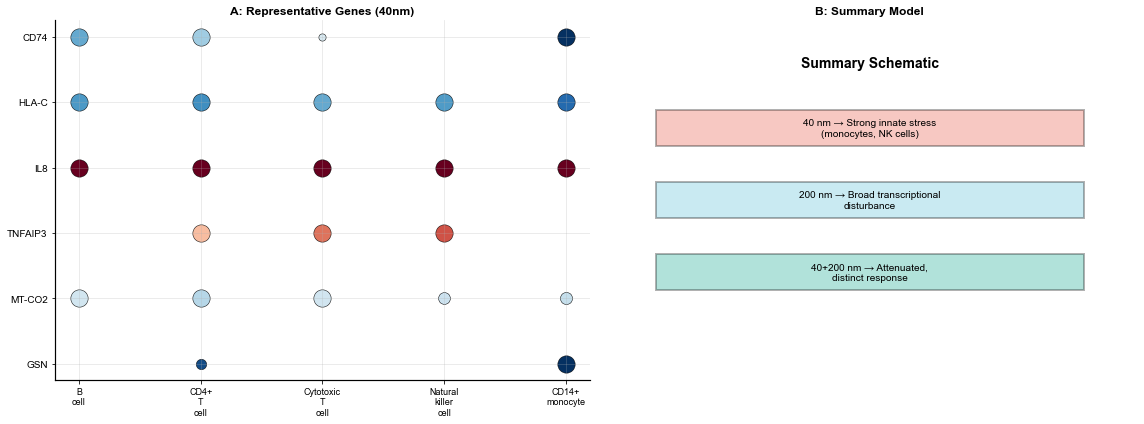

In [6]:
# ============================================================
# FIGURE 6: Cross-cell Comparison
# ============================================================


def create_representative_genes_dotplot(ax, de_results):
    """Helper for representative genes dot plot"""
    genes_innate = ['GSN', 'MT-CO2', 'TNFAIP3']
    genes_adaptive = ['IL8', 'HLA-C', 'CD74']
    all_genes = genes_innate + genes_adaptive

    # Create matrix
    gene_data = []

    for gene in all_genes:
        for ct in CELL_TYPE_ORDER:
            # Use 40nm sample
            sheet_name = f"{ct.replace(' ', '_')}_sample_1"
            if sheet_name in de_results:
                gene_row = de_results[sheet_name][de_results[sheet_name]['names'] == gene]
                if len(gene_row) > 0:
                    logfc = gene_row['logfoldchanges'].values[0]
                    pval = gene_row['pvals_adj'].values[0]
                    gene_data.append({
                        'Gene': gene,
                        'Cell Type': ct,
                        'logFC': logfc,
                        'pval': pval,
                        'size': -np.log10(max(pval, 1e-10))
                    })

    if gene_data:
        df = pd.DataFrame(gene_data)

        # Create dot plot
        for i, gene in enumerate(all_genes):
            for j, ct in enumerate(CELL_TYPE_ORDER):
                gene_ct = df[(df['Gene'] == gene) & (df['Cell Type'] == ct)]
                if len(gene_ct) > 0:
                    color_val = gene_ct['logFC'].values[0]
                    size_val = gene_ct['size'].values[0] * 30
                    ax.scatter(j, i, s=size_val, c=color_val, cmap='RdBu_r',
                             vmin=-2, vmax=2, edgecolor='black', linewidth=0.5)

        ax.set_xticks(np.arange(len(CELL_TYPE_ORDER)))
        ax.set_xticklabels([ct.replace(' ', '\n') for ct in CELL_TYPE_ORDER],
                          fontsize=9, rotation=0)
        ax.set_yticks(np.arange(len(all_genes)))
        ax.set_yticklabels(all_genes, fontsize=10)
        ax.set_title("A: Representative Genes (40nm)", fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3)
        logger.info(f"    Plotted {len(all_genes)} genes across {len(CELL_TYPE_ORDER)} cell types")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


def create_summary_schematic(ax):
    """Helper for summary schematic"""
    ax.text(0.5, 0.9, 'Summary Schematic', ha='center', va='top',
           fontsize=14, fontweight='bold', transform=ax.transAxes)

    # Simplified schematic
    y_positions = [0.7, 0.5, 0.3]
    labels = [
        '40 nm → Strong innate stress\n(monocytes, NK cells)',
        '200 nm → Broad transcriptional\ndisturbance',
        '40+200 nm → Attenuated,\ndistinct response'
    ]
    colors = [SAMPLE_COLORS['40nm'], SAMPLE_COLORS['200nm'], SAMPLE_COLORS['40+200nm']]

    for y, label, color in zip(y_positions, labels, colors):
        ax.add_patch(plt.Rectangle((0.1, y-0.05), 0.8, 0.1,
                                   facecolor=color, alpha=0.3,
                                   edgecolor='black', linewidth=2,
                                   transform=ax.transAxes))
        ax.text(0.5, y, label, ha='center', va='center', fontsize=10,
               transform=ax.transAxes)

    ax.set_title("B: Summary Model", fontsize=12, fontweight='bold')
    ax.axis('off')
    logger.info("    Generated summary schematic")

    

"""Create Figure 6 panels: Cross-cell comparison"""
logger.info("Creating Figure 6...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Figure 6A: Dot plot of representative genes
logger.info("  Generating representative genes dot plot (6A)...")
ax = axes[0]
create_representative_genes_dotplot(ax, de_results)

# Figure 6B: Summary schematic
logger.info("  Generating summary schematic (6B)...")
ax = axes[1]
create_summary_schematic(ax)

plt.tight_layout()
plt.savefig(FIG_DIR / 'Figure_6_cross_cell_comparison.pdf')
plt.savefig(FIG_DIR / 'Figure_6_cross_cell_comparison.png')
# plt.close()
logger.info("  ✓ Saved Figure_6_cross_cell_comparison")
logger.info("✓ Figure 6 complete")


